# Part I - Ford GoBike System Data Exploration
## by Mark Wamiru

## Introduction
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.
The data consists of info about trips taken by services' members, their types, their age, their gender, stations of starting and ending trips, duration of trips etc.

Below are the features of the dataset:

* duration_sec 
* start_time	
* end_time	
* start_station_id	
* start_station_name	
* start_station_latitude	
* start_station_longitude	
* end_station_id	
* end_station_name	
* end_station_latitude	
* end_station_longitude	
* bike_id	
* user_type	
* member_birth_year	
* member_gender	
* bike_share_for_all_trip

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
fgb=pd.read_csv('201902-fordgobike-tripdata.csv')
fgb.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
#doing programmatic assessment of the data
print(fgb.shape)
print('*' *50)
print(fgb.info())
print('*' *50)
print(fgb.dtypes)
fgb.head()

(183412, 16)
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
fgb.duration_sec.describe()

count    183412.000000
mean        726.078435
std        1794.389780
min          61.000000
25%         325.000000
50%         514.000000
75%         796.000000
max       85444.000000
Name: duration_sec, dtype: float64

In [5]:
#check for null values in the dataset
fgb.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

From my assessment of the dataset, I have found the below issues in the dataset which I will need to correct before I proceed with my exploration:
* Null values in the `start_station_id`,`start_station_name `,`end_station_id `,`end_station_name`,`member_birth_year` and `member_gender` columns
* Incorrect datatypes for the following features:
1. `start_time`
2. `end_time`
3. `start_station_id`
4. `end_station_id `
5. `bike_id `
6. `user_type`
7. `member_gender`
8. `bike_share_for_all_trip`

In [6]:
#Cleaning the data
#Convert the stat and end time to datetime
fgb['start_time'] = pd.to_datetime(fgb['start_time'])
fgb['end_time'] = pd.to_datetime(fgb['end_time'])

#Convert start_station_id, end_station)id and bike_id to string
fgb.start_station_id = fgb.start_station_id.astype(str)
fgb.end_station_id = fgb.end_station_id.astype(str)
fgb.bike_id = fgb.bike_id.astype(str)

#COnvert user_type to categorical
fgb.user_type=fgb.user_type.astype('category')
fgb.member_gender=fgb.member_gender.astype('category')
fgb.bike_share_for_all_trip=fgb.bike_share_for_all_trip.astype('category')

In [7]:
# Drop Null values
fgb.dropna(inplace=True)

In [8]:
# Add new variable called age and set datatype as integer
fgb['age'] = (2019 - fgb['member_birth_year']).astype(int)

In [9]:
#Confirm the cleaning was successful
print(fgb.shape)
print('\n','*' *50,'\n')
print(fgb.info())
print('\n','*' *50,'\n')

(174952, 17)

 ************************************************** 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id   

### What is the structure of your dataset?

> Initially, the dataset contained 183412 records and 16 features(`duration_sec`,`start_time`,`end_time`,`start_station_id`,`start_station_name`,`start_station_latitude`,`start_station_longitude`,`end_station_id`,`end_station_name`,`end_station_latitude`,`end_station_longitude`,`bike_id	user_type`,`member_birth_year`,`member_gender`,`bike_share_for_all_trip`). The datatypes of the variables range from float to datetime and categories too. 

> After, data wrangling on the dataset and cleaning it, I now have 174952 records and 17 features now, after addition of `age` feature. 


### What is/are the main feature(s) of interest in your dataset?

>  The main feaure of interest is duration_sec. I am interested in knowing how the other variables play a part in the duration of trips.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I believe the user_type, member_gender and age may help support my investigation. My first hunch is that guys in the younger demography will have longer trips. I also tend to think that males will have longer trips as opposed to ladies.

## Univariate Exploration

###  Distribution of `duration_sec`

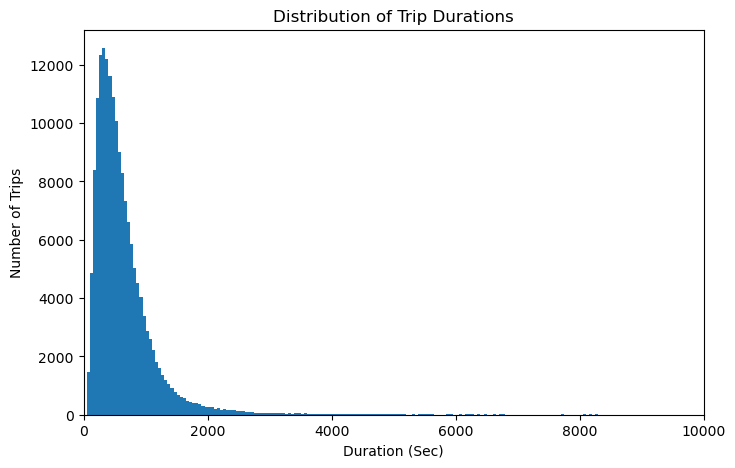

In [10]:
#we'll start with a standard-scaled plot
binsize = 50
bins = np.arange(50, fgb['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = fgb, x = 'duration_sec', bins=bins)
plt.title('Distribution of Trip Durations')
plt.ylabel('Number of Trips')
plt.xlabel('Duration (Sec)')
plt.xlim([0, 10000]);

There is a long tail in the distribution so I am going to put this in a logaritmic scale instead.

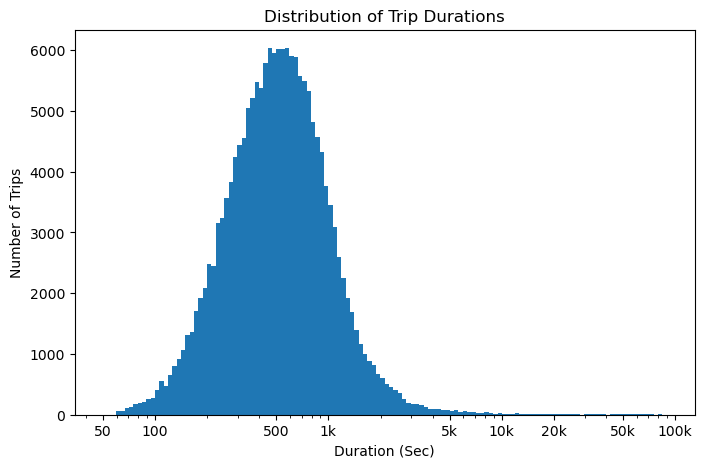

In [11]:
# Plotting the log scale
log_binsize = 0.025
bins = 10 ** np.arange(1.7, np.log10(fgb['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = fgb, x = 'duration_sec', bins=bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (sec)')
plt.ylabel('Number of Trips')
plt.xscale('log')
plt.xticks([50, 1e2, 5e2, 1e3, 5e3, 1e4, 2e4, 5e4, 1e5], [50, '100', '500', '1k', '5k', '10k', '20k', '50k', '100k'])
plt.xlabel('Duration (Sec)');

We have  lot of trips between ~200-1000 seconds. We also have few trips on either sides of this spectrum. Point to note is that the most trips are in the 500sec duration after which the trend falls drastically to a few trips in the 10000 second duration. After the 10k sec duration we also notice we still have a few more sparsely distributed trips.

### Plot user_types

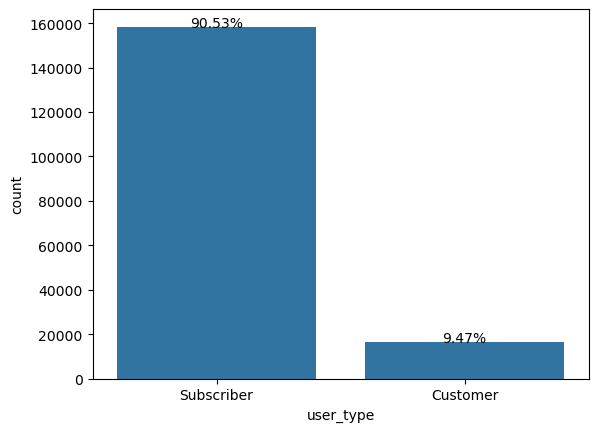

In [12]:
# plotting types of users on bar.
ax = sb.countplot(data = fgb, x = 'user_type',  color=sb.color_palette()[0], order=fgb.user_type.value_counts().index)

total = len(fgb)
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+.05
    ax.annotate(percentage, (x, y),ha='center')
plt.show();


90.53% of users are of type `Subscriber` as opposed to 9.47% of users who are of type `Customer`. 

### Distribution of `member_gender`

Text(0.5, 1.0, 'Distribution of Gender')

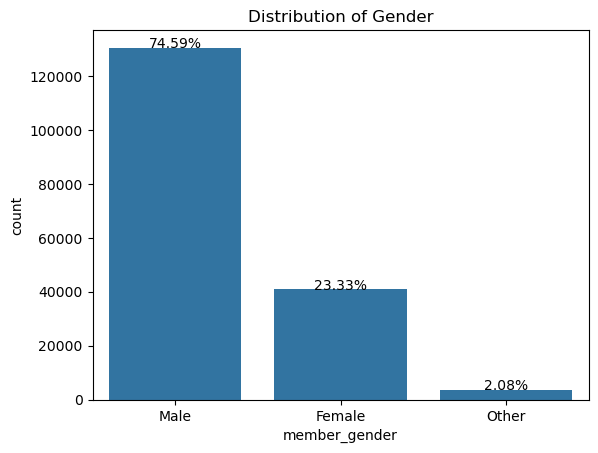

In [37]:
#Plotting gender distribution
ax = sb.countplot(data = fgb, x = 'member_gender',  color=sb.color_palette()[0], order=fgb.member_gender.value_counts().index)

total = len(fgb)
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+.05
    ax.annotate(percentage, (x, y),ha='center')
plt.title('Distribution of Gender')  

### Distribution of `bike_share_for_all_trip`

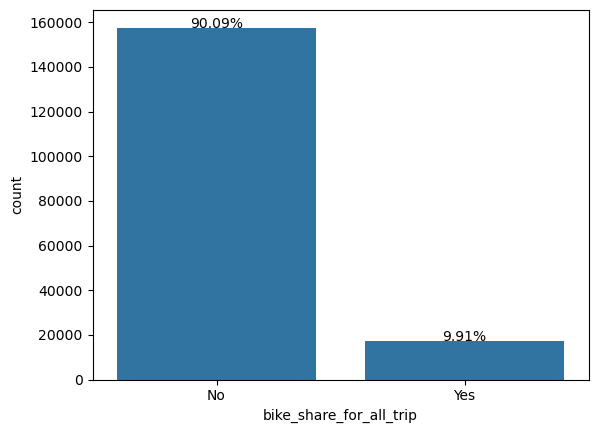

In [14]:
# ride frequency per bike_share_for_all_trip
ax = sb.countplot(data = fgb, x = 'bike_share_for_all_trip',  color=sb.color_palette()[0],
                  order=fgb.bike_share_for_all_trip.value_counts().index)

total = len(fgb)
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+.05
    ax.annotate(percentage, (x, y),ha='center')
plt.show();

Putting the above 3 plots into one figure with subplots:

<AxesSubplot:xlabel='bike_share_for_all_trip', ylabel='count'>

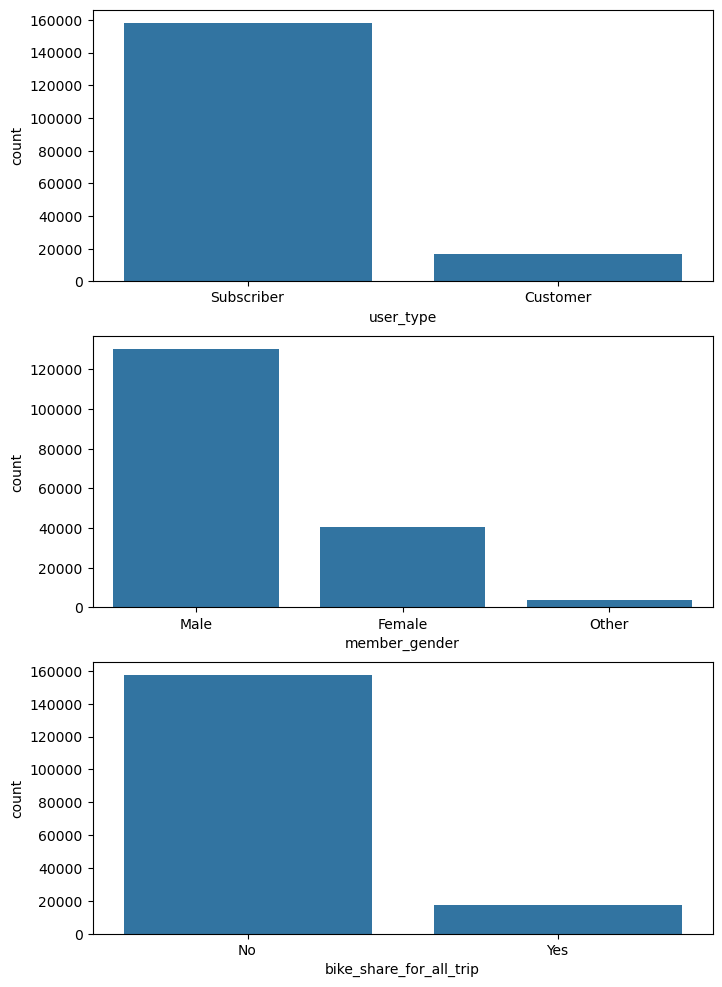

In [15]:
fig, ax = plt.subplots(3,figsize = [8,12])

default_color = sb.color_palette()[0]
sb.countplot(data = fgb, x = 'user_type', color = default_color, order=fgb.user_type.value_counts().index, ax = ax[0])
sb.countplot(data = fgb, x = 'member_gender', color = default_color, order=fgb.member_gender.value_counts().index, 
             ax = ax[1])
sb.countplot(data = fgb, x = 'bike_share_for_all_trip',  order=fgb.bike_share_for_all_trip.value_counts().index,
             color = default_color, ax = ax[2])

### Distribution of `age`

Text(0.5, 1.0, 'Age Distribution')

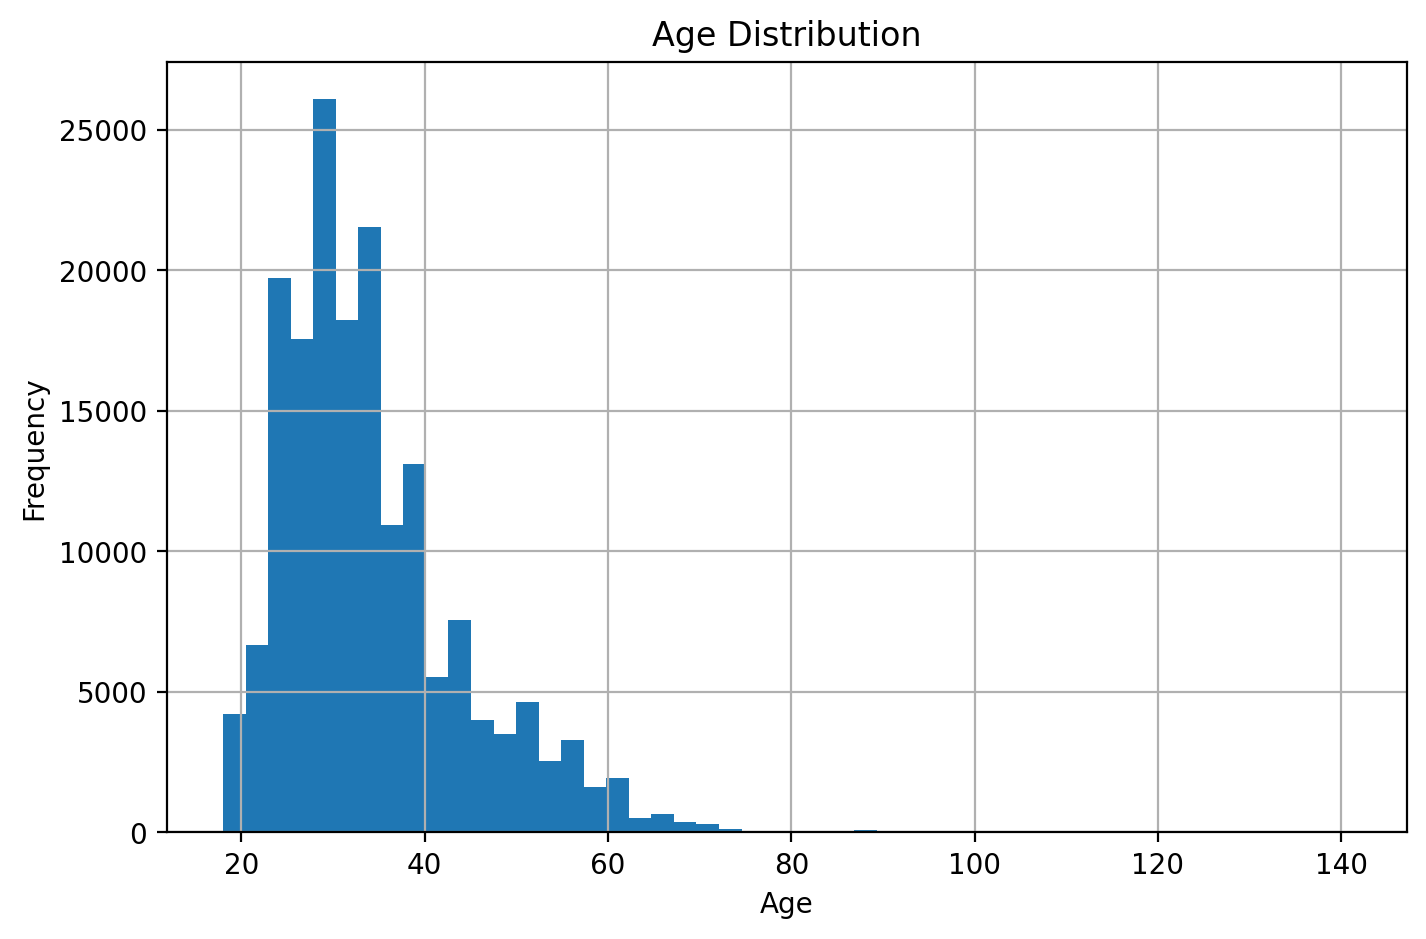

In [16]:
#Plot the age distribution
plt.figure(figsize = (8,5), dpi = 200)

fgb['age'].hist(bins= 50);

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title("Age Distribution")

I have noticed there are users whose ages are above 100 and this is quite unlikely.

In [17]:
#checking the age feature
fgb.age.describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: age, dtype: float64

In [18]:
fgb.query('age > 100').age.value_counts()

119    53
117    11
118     6
141     1
109     1
Name: age, dtype: int64

In [19]:
fgb.query('age > 100').member_birth_year.value_counts()

1900.0    53
1902.0    11
1901.0     6
1878.0     1
1910.0     1
Name: member_birth_year, dtype: int64

After inspecting the data in the the age column, I have come up with the below conclusions:
1. For person with age as 141, this may have been a data entry issue, instead of putting member_birth_year as 1978, she put it as 1878.
2. For those with member_birth_year as 1900, they may have just put the default year and not correct year, so these will be dropped
3. For those with member_birth_year as 1902 and 1901, this may have been data entry issue and 0 was put instead of 9 to be 1991 and 1992 respectively.
4. All the others will be dropped

In [20]:
fgb.loc[fgb['member_birth_year'] == 1878, 'member_birth_year'] = 1978
fgb.loc[fgb['member_birth_year'] == 1901, 'member_birth_year'] = 1991
fgb.loc[fgb['member_birth_year'] == 1902, 'member_birth_year'] = 1992
fgb['age'] = (2019 - fgb['member_birth_year']).astype(int)

In [21]:
fgb.query('age > 100').member_birth_year.value_counts()

1900.0    53
1910.0     1
Name: member_birth_year, dtype: int64

In [22]:
# Remove the remaining ages with outliers

fgb=fgb.query('age <= 100')

fgb.shape

(174898, 17)

In [23]:
fgb.query('age > 100').member_birth_year.value_counts()

Series([], Name: member_birth_year, dtype: int64)

Text(0.5, 1.0, 'Age Distribution')

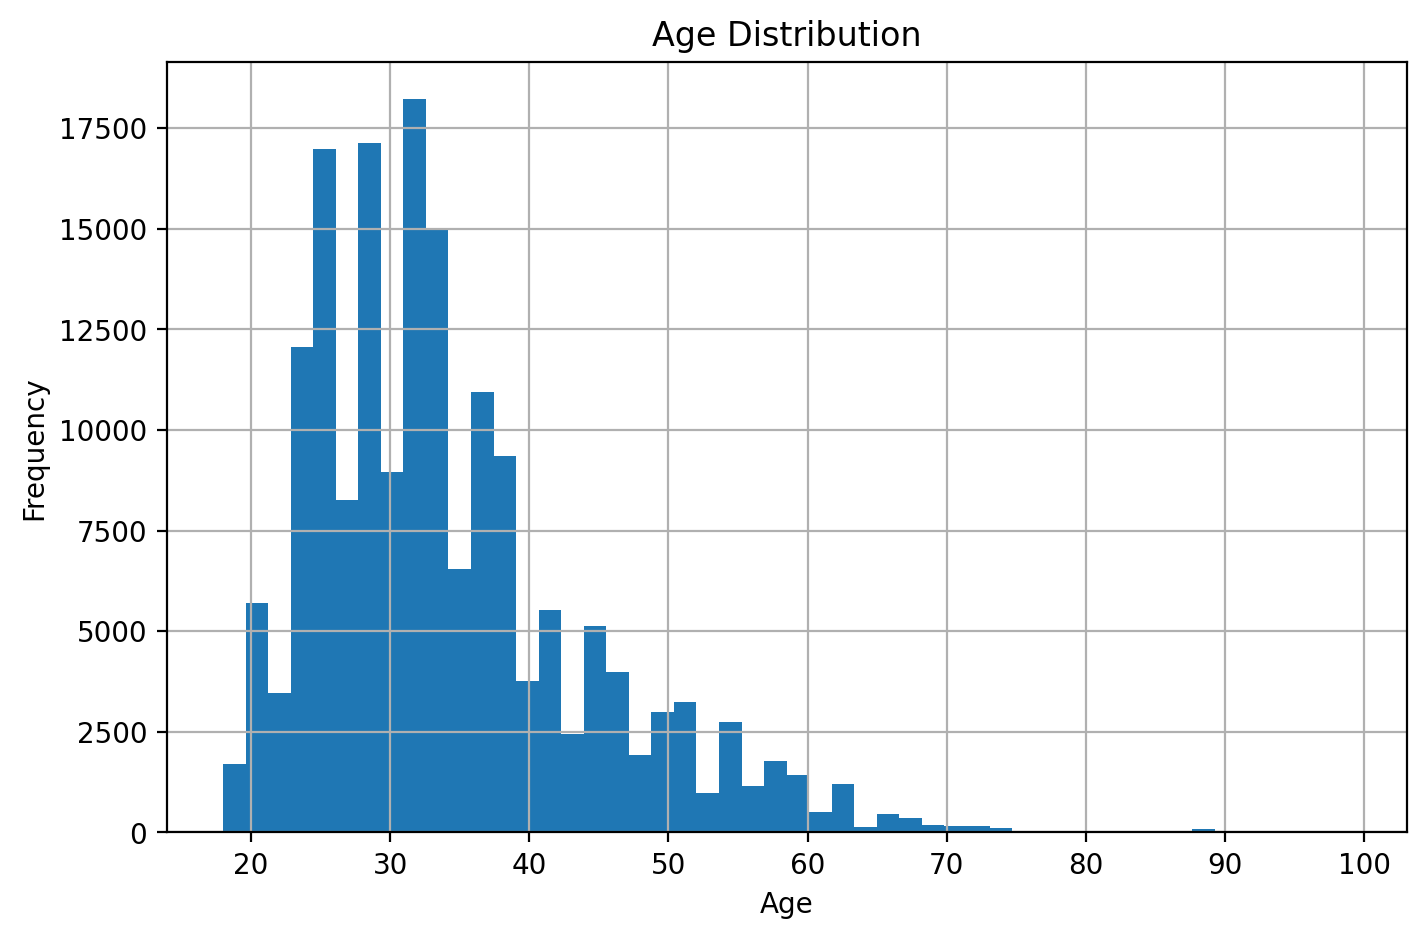

In [24]:
#Plot the age distribution again
plt.figure(figsize = (8,5), dpi = 200)

fgb['age'].hist(bins= 50);

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title("Age Distribution")

Most users fall between the ages of 20 and 40.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
> The trip duration took a large range of values so I looked at it in log transform and found that peak occurs at about 600 seconds starting from 0. After the peak the trend in the distribution dips drastically until a duration of about 100000secs

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> In the `age` column I noticed some outliers (e.g. age = 141) which I attributed to incorrect data entry in the `member_birth_year` column and went ahead to correct some of the issues and eventually dropped others.

## Bivariate Exploration

In [25]:
numeric_vars=['age','duration_sec']

### Distribution of `age` in relation to `member_gender`

Text(0.5, 1.0, 'Distribution of age in relation to gender ')

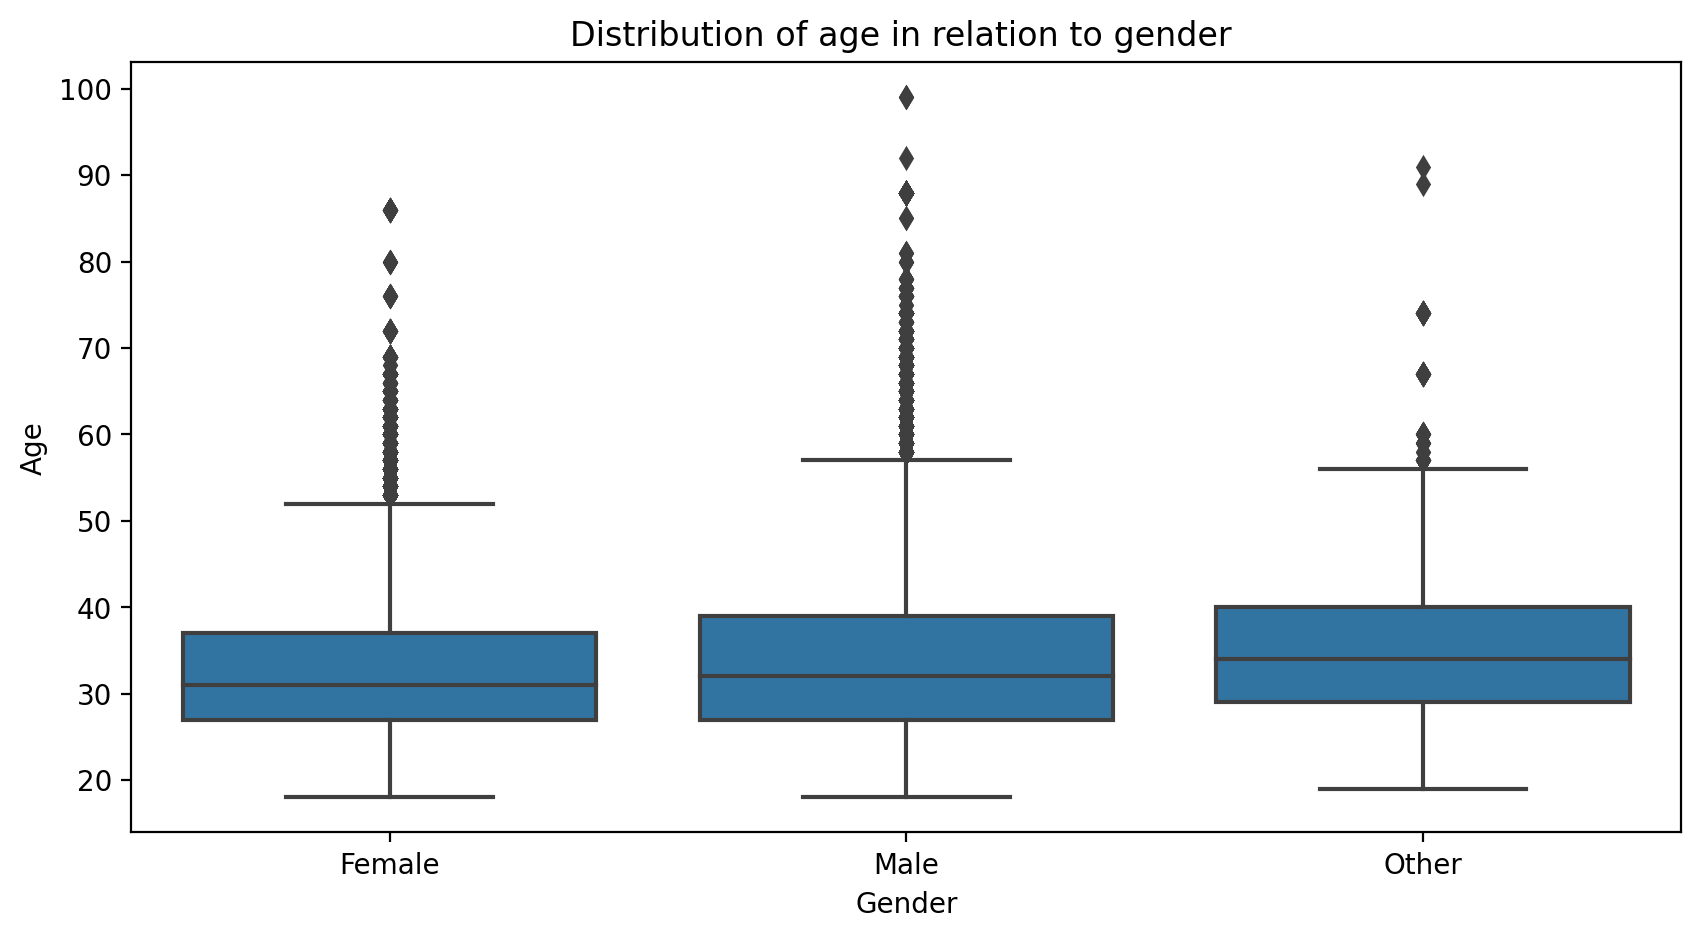

In [26]:
plt.figure(figsize = (10,5), dpi = 200)
base_color = sb.color_palette()[0]
sb.boxplot(data=fgb,x = "member_gender", y = "age", color=base_color)
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title("Distribution of age in relation to gender ")

From the boxplots we can see that majority of users are male, followed by females then other. The interesting observation is that the median age of participants in all categories lies between the ages of 31 to 33. 

### Distribution of duration in relation to gender

Text(0.5, 1.0, 'Relationship between duration and gender')

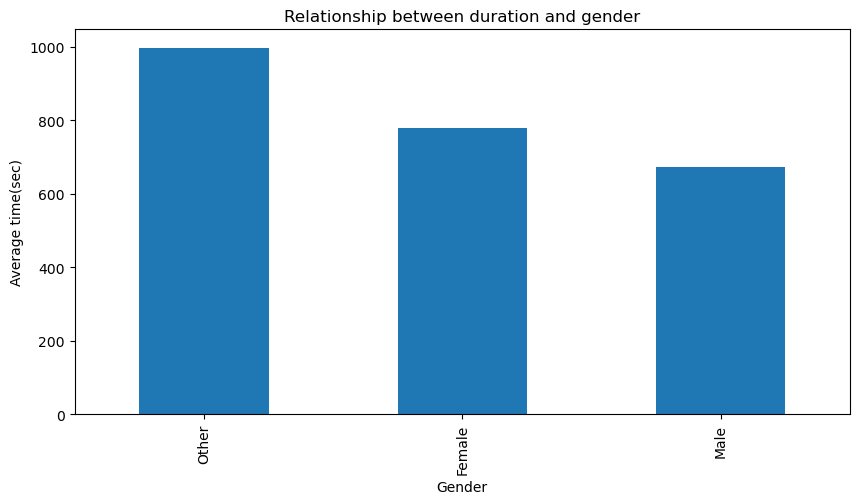

In [27]:
plt.figure(figsize = (10,5), dpi = 100)
fgb.groupby('member_gender')['duration_sec'].mean().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Average time(sec)')
plt.title("Relationship between duration and gender")

On average, males tend to have a shorter trip than the other gender categories.

### Relationship between user_type and duration

Text(0.5, 1.0, 'Relationship between user_type and duration')

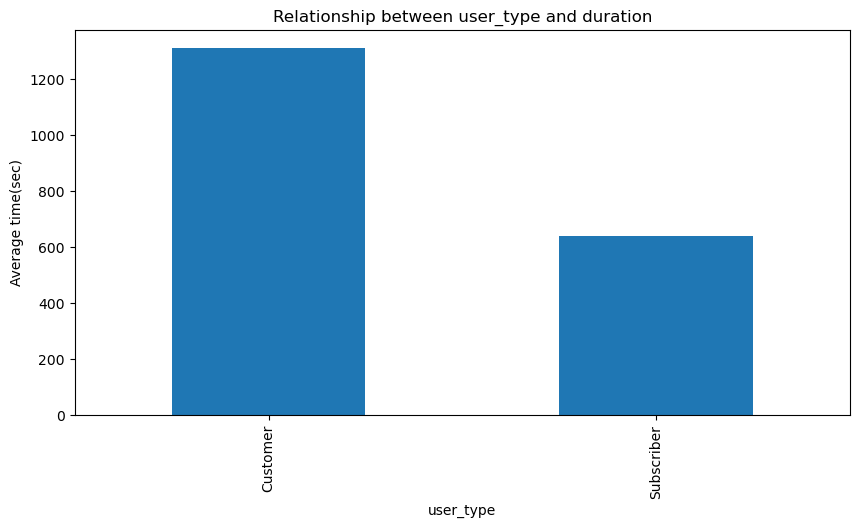

In [28]:
plt.figure(figsize = (10,5), dpi = 100)
fgb.groupby('user_type')['duration_sec'].mean().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('user_type')
plt.ylabel('Average time(sec)')
plt.title("Relationship between user_type and duration")

User type, customer tend to have longer trips than subscriber

### Relationship between duration and age

Text(0, 0.5, 'Duration (sec)')

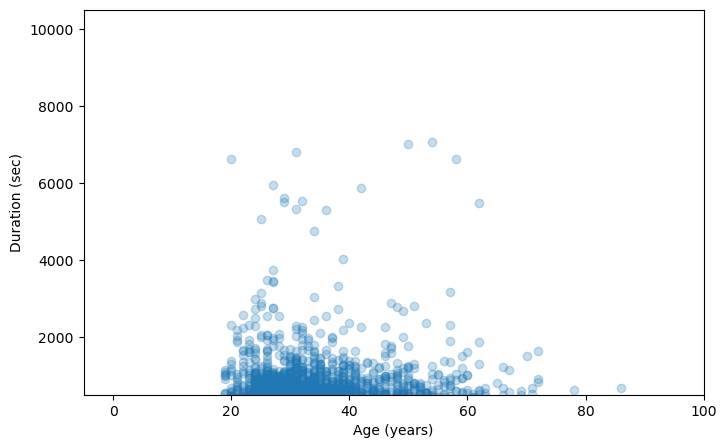

In [29]:
samples = np.random.choice(fgb.shape[0], 2000, replace = False)
bikes_samp = fgb.iloc[samples,:]
plt.figure(figsize=[8,5])
plt.scatter(bikes_samp.age, bikes_samp.duration_sec, alpha = 0.25, marker = 'o' )
plt.axis([-5, 100, 500, 10500])
plt.xlabel('Age (years)')
plt.ylabel('Duration (sec)')

Text(0, 0.5, 'Duration (sec)')

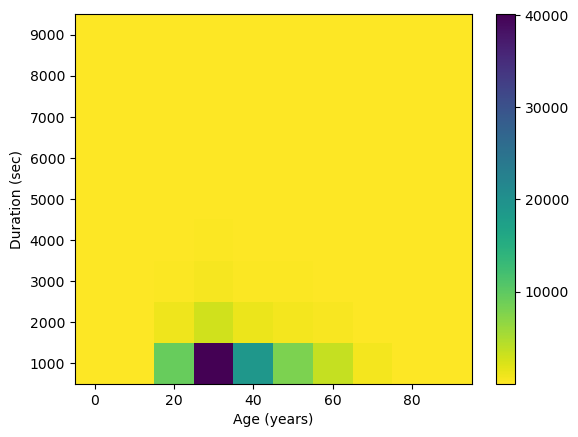

In [30]:
bins_y = np.arange(500, 10000, 1000)
bins_x = np.arange(-5, 100+1, 10)
plt.hist2d(fgb.age, fgb.duration_sec,bins = [bins_x, bins_y],cmap='viridis_r')
plt.colorbar(ticks=[10000, 20000, 30000, 40000])
plt.xlabel('Age (years)')
plt.ylabel('Duration (sec)')

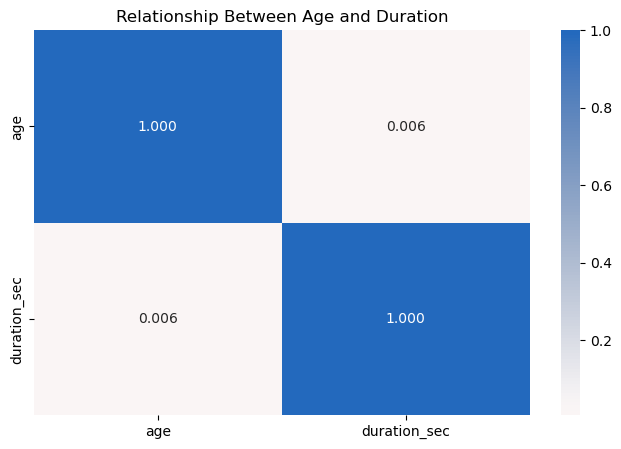

In [31]:
plt.figure(figsize = [8, 5])
sb.heatmap(fgb[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Relationship Between Age and Duration');

From the above 2 plots and the heatmap, there seems to be a very weak correlation, approaching none,between the two numeric variables of `age` and `duration_sec`. Based on the correlation, age is slightly correlated with duration, quite contradictory to my first assumption. However, it actually make sense that in this dataset, the major population of age is between 30 and 40 years old. We have less samples in the older population.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Majority of users we males, then followed by females and ultimatley others, and the majority of them were of ages between 30-35.
> On average, males tend to have a shorter trip duration than the other gender categories. This however can be attributed to the fact that they make up most of the data in the dataset as opposed to the other genders.
> User type, customer tend to have on average longer trips than subscriber.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> My initial assumption from the data set was that there would be a strong correlation between age and duration but on further scrutinizing this I found that this wasn't the case. The correlation between these variables, though positive, was very weak and not enough to use in making conclusions or decisions based on this.

## Multivariate Exploration

[]

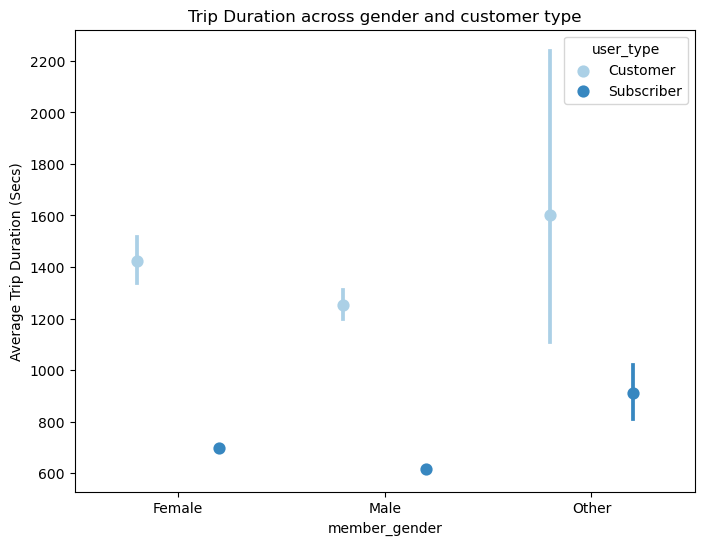

In [32]:
#Plot pointplot to show rship between gender, usertype and duration
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = fgb, x ='member_gender', y = 'duration_sec', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Trip Duration across gender and customer type')
plt.ylabel('Average Trip Duration (Secs)')
ax.set_yticklabels([],minor = True)

We can see that for both user_types, customer and subscriber, the gender `other` had longer trip durations then followed by `female` and lastly `male`

[]

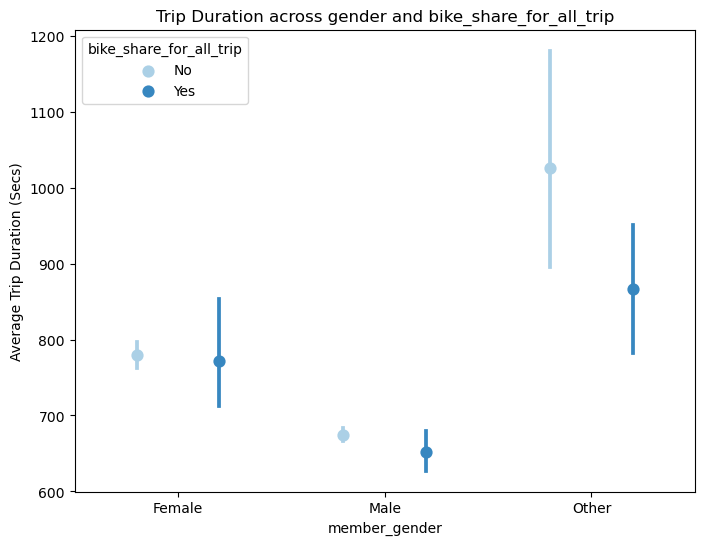

In [33]:
# plotting to show relationship between gender, duration and bike_share_for_all_trip
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = fgb, x ='member_gender', y = 'duration_sec', hue = 'bike_share_for_all_trip',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Trip Duration across gender and bike_share_for_all_trip')
plt.ylabel('Average Trip Duration (Secs)')
ax.set_yticklabels([],minor = True)

The `other` gender group travels for the longest duration for bike sharing and non bike sharing categories, followed by `female` then `male`

[]

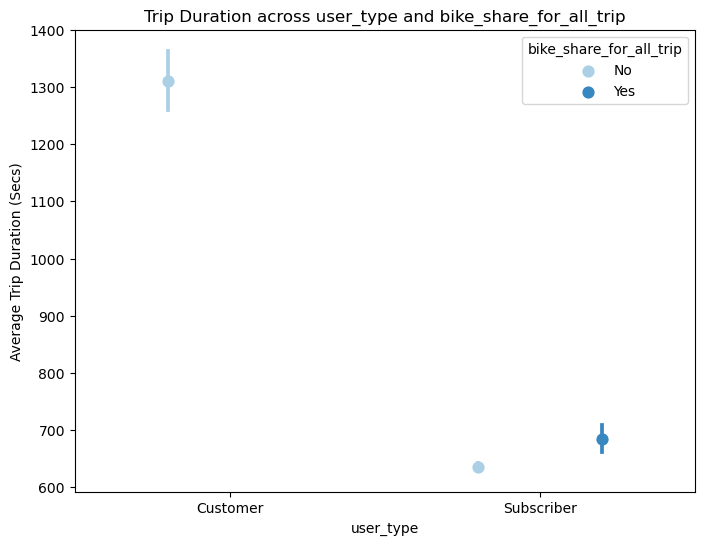

In [34]:
# plotting to show relationship user_type, duration and bike_share_for_all_trip
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = fgb, x ='user_type', y = 'duration_sec', hue = 'bike_share_for_all_trip',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Trip Duration across user_type and bike_share_for_all_trip')
plt.ylabel('Average Trip Duration (Secs)')
ax.set_yticklabels([],minor = True);

Bike sharing isn't available for user type customers or customers never requested to share bikes. However, customer user type tend to have longer trips than subscriber for those who don't share bikes. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> For both user_types, customer and subscriber, the gender `other` had longer trip durations then followed by `female` and lastly `male`
> The `other` gender group have the longest trip duration for bike sharing and non bike sharing categories, followed by `female` then `male`
> Bike sharing isn't available for user type customers. However, customer user type tend to have longer trips than subscriber for those who don't share bikes. 


## Conclusions

1. Most users were male
2. Most users fell in the subsriber category
3. Most trips have a duration of 500 seconds
4. Females generally have longer trips than males and others
5. Only subscribers are allowed to share bikes on trips
6. Customers have longer trip durations than subscribers

In [35]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Ford GoBike System Data Part 1.ipynb'])

1